<a href="https://colab.research.google.com/github/sreedevigattu/wids2021/blob/main/Arjun_Wids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


In [7]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/widsdatathon2021.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive')

###Data Viz

In [10]:
df=pd.read_csv('/content/drive/MyDrive/TrainingWiDS2021.csv',index_col=0)

In [11]:
df

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.450,33.0,145.0,...,11.3,11.3,36.9,36.9,1.30,1.30,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.450,7.450,51.0,51.0,54.8,51.000000,37.0,37.0,7.450,7.450,51.0,51.0,51.0,51.0,0,0,0,0,0,0,0,1
3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.390,4.0,NaN,...,11.6,11.6,34.0,34.0,1.60,1.10,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.440,7.340,337.0,102.0,342.5,236.666667,36.0,33.0,7.370,7.340,337.0,265.0,337.0,337.0,0,0,0,0,0,0,0,0
5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130153,164758,7,50.0,29.287256,0,Caucasian,M,175.3,Emergency Department,Accident & Emergency,1109,admit,Cardiac ICU,0.023611,0,90.0,NaN,110.0,104.01,0,0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5.0,NaN,106.0,NaN,0,120.0,NaN,NaN,NaN,NaN,50.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
130154,197653,7,79.0,29.653433,0,Caucasian,F,162.6,Direct Admit,Accident & Emergency,1106,admit,MICU,0.009722,0,78.4,3.5,105.0,207.01,0,0,0.7,32.0,1.07,NaN,4.0,6

In [12]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130157 entries, 1 to 130157
Columns: 180 entries, encounter_id to diabetes_mellitus
dtypes: float64(157), int64(17), object(6)
memory usage: 179.7+ MB


In [15]:
df.columns[]

Index(['encounter_id', 'hospital_id', 'age', 'bmi', 'elective_surgery',
       'ethnicity', 'gender', 'height', 'hospital_admit_source',
       'icu_admit_source',
       ...
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'diabetes_mellitus'],
      dtype='object', length=180)

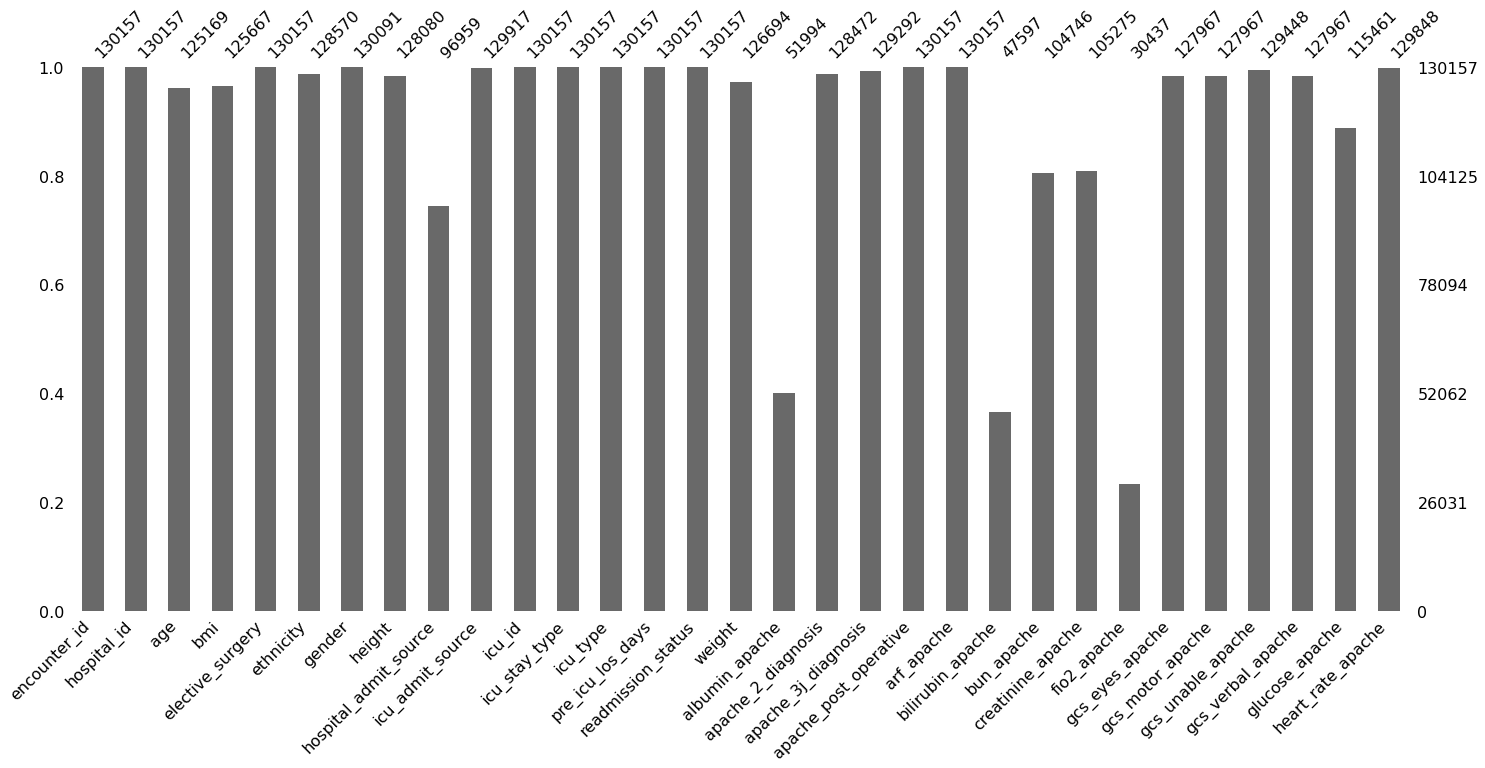

In [19]:
msno.bar(df.iloc[:,0:31])

In [20]:
df['hospital_id'].nunique()

204

In [22]:
df_ul=pd.read_csv('/content/drive/MyDrive/UnlabeledWiDS2021.csv',index_col=0)
df_ul

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,...,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
1,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,Accident & Emergency,82,admit,Med-Surg ICU,0.015278,0,NaN,2.8,110.0,104.01,0,0,1.9,44.0,1.49,NaN,4.0,6.0,0.0,5.0,97.0,38.0,39.9,0,54.0,NaN,NaN,NaN,NaN,31.0,130.0,...,26.0,14.5,14.5,42.8,42.8,NaN,NaN,NaN,NaN,173.0,173.0,4.9,4.9,132.0,132.0,5.6,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
2,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,Accident & Emergency,82,admit,Med-Surg ICU,0.000000,0,NaN,NaN,117.0,106.01,0,0,NaN,19.0,0.92,NaN,4.0,6.0,0.0,5.0,73.0,116.0,NaN,0,41.0,NaN,NaN,NaN,NaN,53.0,142.0,...,NaN,NaN,NaN,NaN,NaN,2.20,2.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
3,142038,10141,72,NaN,0,Caucasian,F,162.6,Floor,Floor,82,admit,Med-Surg ICU,0.003472,0,NaN,3.2,302.0,109.01,0,0,0.9,24.0,0.77,NaN,4.0,6.0,0.0,5.0,84.0,104.0,34.8,0,117.0,NaN,NaN,NaN,NaN,38.0,137.0,...,32.0,11.8,11.8,36.6,36.6,2.90,2.40,NaN,NaN,243.0,243.0,3.6,3.6,141.0,141.0,6.6,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
4,138628,10141,66,NaN,0,Caucasian,M,177.8,Floor,Floor,82,admit,Med-Surg ICU,0.884028,0,NaN,NaN,113.0,501.05,0,0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,4.0,NaN,110.0,NaN,0,61.0,NaN,NaN,NaN,NaN,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
5,141682,10141,89,NaN,0,Caucasian,M,170.2,Direct Admit,Accident & Emergency,82,admit,Med-Surg ICU,0.013194,0,NaN,3.4,117.0,106.01,0,0,0.4,26.0,1.50,NaN,4.0,6.0,0.0,5.0,99.0,34.0,33.0,0,136.0,NaN,NaN,NaN,NaN,35.0,133.0,...,30.0,10.7,10.7,33.0,33.0,1.10,1.10,NaN,NaN,154.0,154.0,4.0,4.0,133.0,133.0,6.2,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,143750,10140,36,37.5,0,Caucasian,F,170.1,Floor,Floor,1108,admit,Med-Surg ICU,1.696528,0,108.6,NaN,305.0,901.02,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,111.0,29.0,0,127.0,NaN,NaN,NaN,NaN,45.0,NaN,...,NaN,9.8,9.8,30.0,30.0,1.07,1.07,NaN,NaN,158.0,158.0,NaN,NaN,NaN,NaN,7.2,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
10231,143813,10140,61,32.1,0,Caucasian,F,160.0,Emergency Department,Accident & Emergency,1108,admit,Med-Surg ICU,0.033333,0,82.3,NaN,124.0,305.02,0,0,NaN,33.0,1.15,NaN,4.0,6.0,0.0,5.0,94.0,106.0,27.0,0,166.0,NaN,NaN,NaN,NaN,49.0,139.0,.

In [26]:
df.loc[df['hospital_id'].isin(df_ul['hospital_id'])]
# So the test set do not have patient data from same hospitals- Need for train test split without same hospital

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus


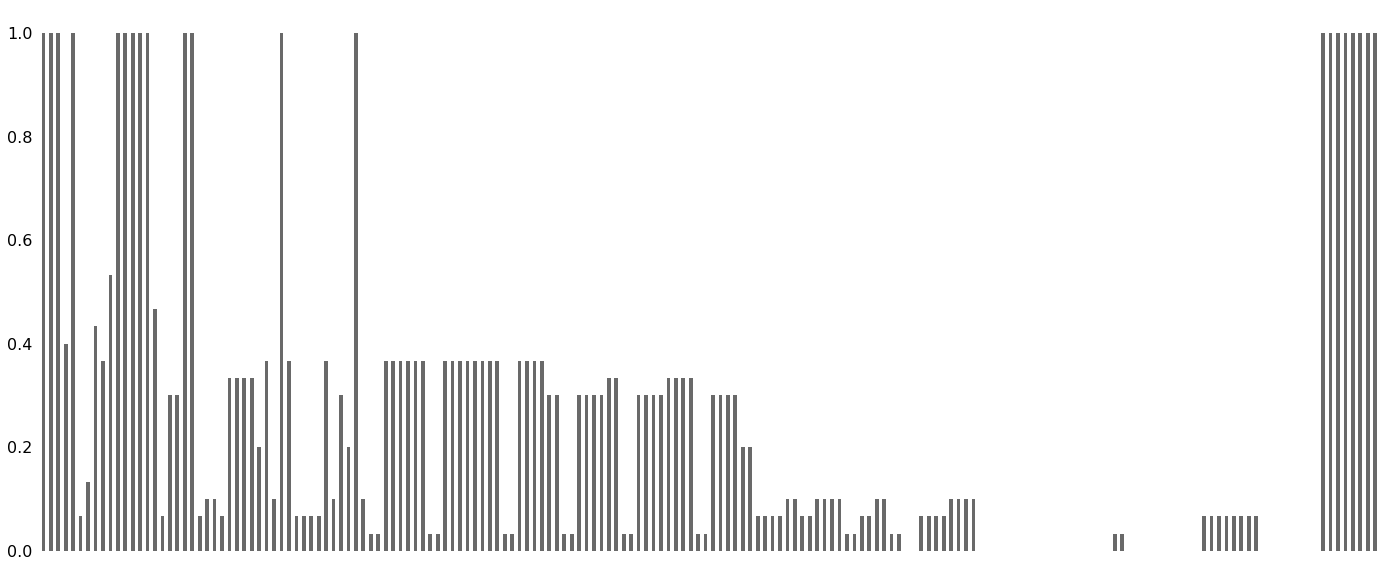

In [37]:
msno.bar(df.loc[(df['age']==0 | df['age'].isnull()) | (df['weight']==0 | df['weight'].isnull())])

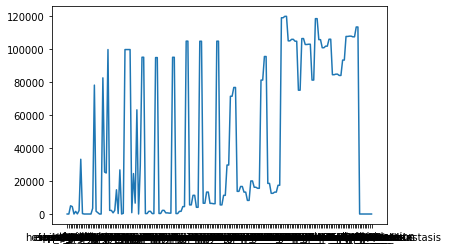

In [43]:
plt.plot(df.isnull().sum())

In [44]:
df[df.columns[31:40]]

Index(['heart_rate_apache', 'hematocrit_apache', 'intubated_apache',
       'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache',
       'ph_apache', 'resprate_apache', 'sodium_apache'],
      dtype='object')

In [45]:
ddic=pd.read_csv('/content/drive/MyDrive/DataDictionaryWiDS2021.csv')

In [47]:
ddic['Category'].unique()

array(['identifier', 'demographic', 'APACHE covariate', 'vitals', 'labs',
       'labs blood gas', 'APACHE comorbidity', 'Target Variable'],
      dtype=object)

In [54]:
#Vitals Data dictionary
ddic.iloc[:,1:5].loc[ddic['Category']=='vitals']

,Variable Name,Unit of Measure,Data Type,Description
45,d1_diasbp_invasive_max,Millimetres of mercury,numeric,"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, invasively measured"
46,d1_diasbp_invasive_min,Millimetres of mercury,numeric,"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, invasively measured"
47,d1_diasbp_max,Millimetres of mercury,numeric,"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured"
48,d1_diasbp_min,Millimetres of mercury,numeric,"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured"
49,d1_diasbp_noninvasive_max,Millimetres of mercury,numeric,"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured"
50,d1_diasbp_noninvasive_min,Millimetres of mercury,numeric,"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured"
51,d1_heartrate_max,Beats per minute,numeric,The patient's highest heart rate during the first 24 hours of their unit stay
52,d1_heartrate_min,Beats per minute,numeric,The patient's lowest heart rate during the first 24 hours of their unit stay
53,d1_mbp_invasive_max,Millimetres of mercury,numeric,"The patient's highest mean blood pressure during the first 24 hours of their unit stay, invasively measured"
54,d1_mbp_invasive_min,Millimetres of mercury,numeric,"The patient's lowest mean blood pressure during the first 24 hours of their unit stay, invasively measured"


In [66]:
#for Blood pressure
ddic.loc[(ddic['Unit of Measure']=='Millimetres of mercury') & (ddic['Category']=='vitals')]

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
45,vitals,d1_diasbp_invasive_max,Millimetres of mercury,numeric,"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, invasively measured",60
46,vitals,d1_diasbp_invasive_min,Millimetres of mercury,numeric,"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, invasively measured",60
47,vitals,d1_diasbp_max,Millimetres of mercury,numeric,"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",60
48,vitals,d1_diasbp_min,Millimetres of mercury,numeric,"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",60
49,vitals,d1_diasbp_noninvasive_max,Millimetres of mercury,numeric,"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured",60
50,vitals,d1_diasbp_noninvasive_min,Millimetres of mercury,numeric,"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured",60
53,vitals,d1_mbp_invasive_max,Millimetres of mercury,numeric,"The patient's highest mean blood pressure during the first 24 hours of their unit stay, invasively measured",80
54,vitals,d1_mbp_invasive_min,Millimetres of mercury,numeric,"The patient's lowest mean blood pressure during the first 24 hours of their unit stay, invasively measured",80
55,vitals,d1_mbp_max,Millimetres of mercury,numeric,"The patient's highest mean blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",80
56,vitals,d1_mbp_min,Millimetres of mercury,numeric,"The patient's lowest mean blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",80


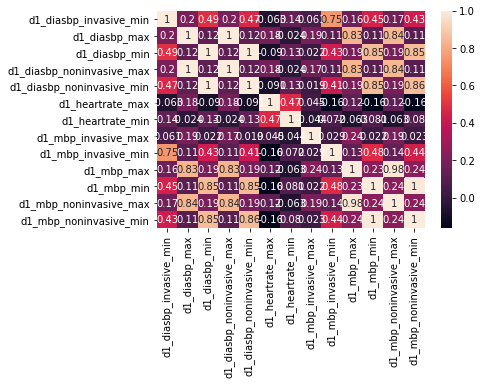

In [73]:
corrMatrix = df.iloc[:,45:58].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
#Diasbp max and Diasbpnon inva max have full correlation even  for min

,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max
d1_diasbp_invasive_min,1.000000,0.200568,0.491954,0.198252,0.466239,-0.063022,0.140330,0.061360,0.750680,0.163607,0.448064,0.173695,0.425728,-0.155233,0.105673,-0.068345,0.193019,0.032220,0.605610,0.109319,0.364273,0.117669,0.351712,-0.062896,0.112174,0.462217,0.655616,0.316273,0.458109,0.292254,0.424957,-0.017494,0.030403,0.228212,0.531552,0.265445,0.413317,0.263714,0.386681,-0.085053,-0.007624,0.003583,0.090287,0.174596,0.364241,0.179166,0.307858,0.198228,0.306185,0.069036
d1_diasbp_max,0.200568,1.000000,0.122753,0.996682,0.118765,0.182932,-0.024183,0.186220,0.111160,0.832013,0.110833,0.841064,0.107664,0.102719,-0.061921,0.061731,-0.103038,0.223667,0.041182,0.612861,0.070480,0.616629,0.071699,0.010837,-0.007705,0.389518,0.333113,0.602519,0.353291,0.601916,0.342407,0.122832,0.066405,0.243410,0.269389,0.501992,0.318500,0.518852,0.314763,0.095792,0.019860,-0.006559,-0.055714,0.239803,0.179561,0.415496,0.261182,0.436859,0.266224,0.034815
d1_diasbp_min,0.491954,0.122753,1.000000,0.119902,0.996599,-0.090127,0.133516,0.021629,0.430759,0.192579,0.852848,0.194126,0.854619,-0.079856,0.128777,-0.121732,0.203873,0.092232,0.361042,0.129160,0.663588,0.131773,0.662921,-0.090912,0.108591,0.314032,0.420868,0.343328,0.614685,0.347228,0.627212,-0.021104,0.033836,0.138759,0.353787,0.370250,0.569954,0.379340,0.583235,-0.051494,0.013650,-0.009409,0.100929,0.145076,0.260405,0.258371,0.422022,0.264979,0.432308,0.029518
d1_diasbp_noninvasive_max,0.198252,0.996682,0.119902,1.000000,0.118334,0.181617,-0.023602,0.171566,0.110878,0.834033,0.109754,0.843767,0.107568,0.100314,-0.064058,0.062145,-0.103079,0.210190,0.047739,0.614794,0.071779,0.618312,0.071191,0.011257,-0.009768,0.372241,0.322192,0.600533,0.349925,0.602565,0.342255,0.122485,0.066269,0.236613,0.261798,0.503187,0.316527,0.518994,0.314403,0.092376,0.016940,-0.005311,-0.055240,0.235075,0.177596,0.417722,0.261001,0.437112,0.265907,0.031521
d1_diasbp_noninvasive_min,0.466239,0.118765,0.996599,0.118334,1.000000,-0.090952,0.132475,0.019012,0.414978,0.193946,0.851661,0.193089,0.857784,-0.079227,0.126853,-0.121680,0.204199,0.096671,0.350745,0.131595,0.662976,0.130684,0.665858,-0.090503,0.107515,0.302751,0.404478,0.340399,0.612791,0.347101,0.627948,-0.022400,0.032719,0.131875,0.340893,0.370755,0.569115,0.379416,0.583988,-0.053203,0.011430,-0.009092,0.101444,0.145465,0.255390,0.260110,0.422546,0.265106,0.432999,0.027518
d1_heartrate_max,-0.063022,0.182932,-0.090127,0.181617,-0.090952,1.000000,0.473052,0.045191,-0.163843,0.118763,-0.158569,0.118837,-0.159147,0.252810,0.038340,0.068020,-0.170139,-0.002678,-0.255246,0.032434,-0.235779,0.032069,-0.234836,0.269677,0.005788,0.129033,0.066749,0.119342,-0.000919,0.113860,-0.008027,0.784549,0.680707,0.027204,-0.045685,0.031977,-0.072171,0.028382,-0.079233,0.258654,0.192021,-0.031939,-0.108111,-0.052223,-0.126611,-0.045561,-0.149838,-0.047009,-0.153858,0.141099
d1_heartrate_min,0.140330,-0.024183,0.133516,-0.023602,0.132475,0.473052,1.000000,-0.044192,0.072315,-0.063269,0.081197,-0.063075,0.080183,0.051733,0.254368,-0.048126,0.073766,-0.119526,0.001323,-0.128671,0.028866,-0.1283

In [64]:
bpcol=np.asarray(ddic['Variable Name'].loc[(ddic['Unit of Measure']=='Millimetres of mercury') & (ddic['Category']=='vitals')])

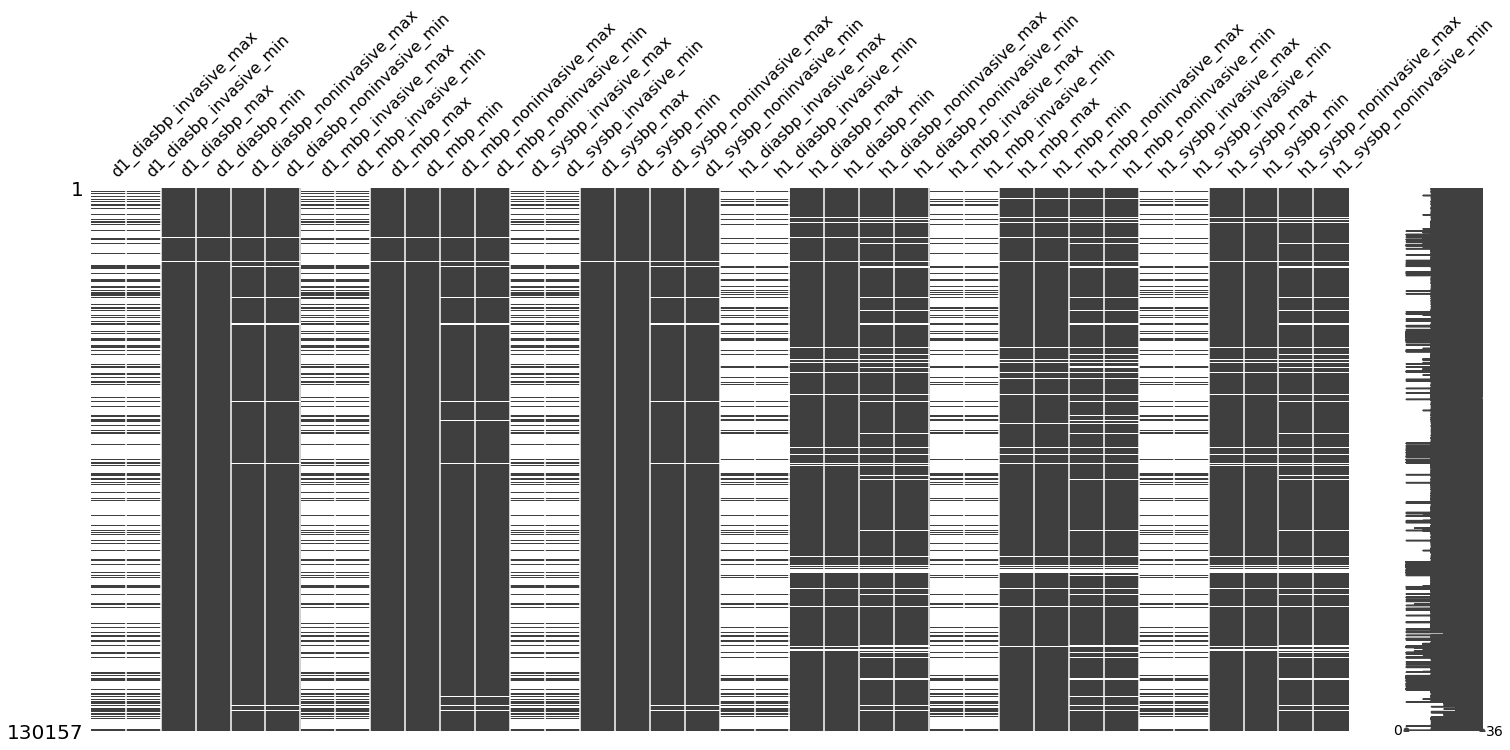

In [65]:
msno.matrix(df[bpcol]) # Pressure values in vitals

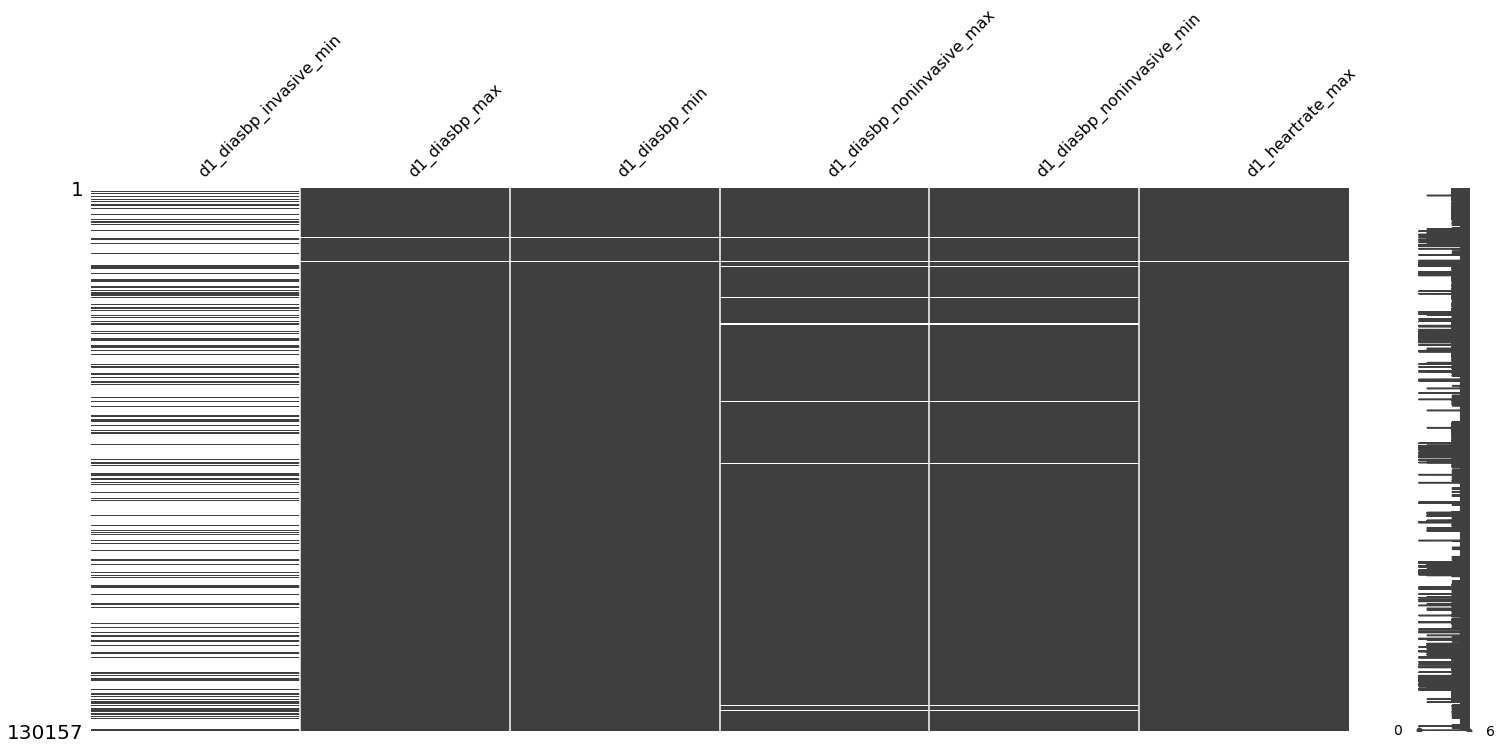

In [56]:
msno.matrix(df.iloc[:,45:51])

In [53]:
pd.options.display.max_colwidth = 150